In [5]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitiude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [8]:
# Import citipy
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [10]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a4255e0dfc9d3791796307275c241775


In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | manbij
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | itarema
Processing Record 6 of Set 1 | sibut
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | inuvik
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 16 of Set 1 | luganville
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | matara
Processing Record 19 of Set 1 | imeni stepana razina
Processing Record 20 of Set 1 | pochutla
Processing Record 21 of Set 1 | port macquarie
Processing Record 22 of Set 1 | kankan
Processing Record 23

Processing Record 39 of Set 4 | castro
Processing Record 40 of Set 4 | falcoiu
Processing Record 41 of Set 4 | caravelas
Processing Record 42 of Set 4 | havelock
Processing Record 43 of Set 4 | ancud
Processing Record 44 of Set 4 | tres arroyos
Processing Record 45 of Set 4 | ambodifototra
City not found. Skipping...
Processing Record 46 of Set 4 | karanja
Processing Record 47 of Set 4 | myitkyina
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | balakhninskiy
Processing Record 50 of Set 4 | maghama
City not found. Skipping...
Processing Record 1 of Set 5 | viedma
Processing Record 2 of Set 5 | puerto ayora
Processing Record 3 of Set 5 | zhanaozen
Processing Record 4 of Set 5 | kochubeyevskoye
Processing Record 5 of Set 5 | socorro
Processing Record 6 of Set 5 | hulan
Processing Record 7 of Set 5 | carutapera
Processing Record 8 of Set 5 | vaiano
Processing Record 9 of Set 5 | katherine
Processing Record 10 of Set 5 | warri
Processing Record 11 of Set 5 | chicama


Processing Record 31 of Set 8 | kuusamo
Processing Record 32 of Set 8 | paamiut
Processing Record 33 of Set 8 | vila franca do campo
Processing Record 34 of Set 8 | beira
Processing Record 35 of Set 8 | trelew
Processing Record 36 of Set 8 | souillac
Processing Record 37 of Set 8 | cherskiy
Processing Record 38 of Set 8 | waingapu
Processing Record 39 of Set 8 | yumen
Processing Record 40 of Set 8 | urengoy
Processing Record 41 of Set 8 | morondava
Processing Record 42 of Set 8 | gisborne
Processing Record 43 of Set 8 | vredendal
Processing Record 44 of Set 8 | bathsheba
Processing Record 45 of Set 8 | bera
Processing Record 46 of Set 8 | sao joao da ponte
Processing Record 47 of Set 8 | quang ngai
Processing Record 48 of Set 8 | golden
Processing Record 49 of Set 8 | griffith
Processing Record 50 of Set 8 | qasigiannguit
Processing Record 1 of Set 9 | weligama
Processing Record 2 of Set 9 | acapulco
Processing Record 3 of Set 9 | nabire
Processing Record 4 of Set 9 | marawi
Processing

Processing Record 18 of Set 12 | lokosovo
Processing Record 19 of Set 12 | bage
Processing Record 20 of Set 12 | shima
Processing Record 21 of Set 12 | pragal
Processing Record 22 of Set 12 | bolshiye chapurniki
City not found. Skipping...
Processing Record 23 of Set 12 | kerman
Processing Record 24 of Set 12 | gondar
Processing Record 25 of Set 12 | ningan
City not found. Skipping...
Processing Record 26 of Set 12 | mayo
Processing Record 27 of Set 12 | jiangyou
Processing Record 28 of Set 12 | sicuani
Processing Record 29 of Set 12 | broken hill
Processing Record 30 of Set 12 | coolum beach
Processing Record 31 of Set 12 | hurricane
Processing Record 32 of Set 12 | greenfield
Processing Record 33 of Set 12 | wajima
Processing Record 34 of Set 12 | kapit
Processing Record 35 of Set 12 | chongqing
Processing Record 36 of Set 12 | sakakah
Processing Record 37 of Set 12 | dunedin
Processing Record 38 of Set 12 | hastings
Processing Record 39 of Set 12 | doctor arroyo
Processing Record 40

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.09,76,77,7.92,PF,2021-12-05 13:42:37
1,Manbij,36.5281,37.9549,57.97,34,100,9.62,SY,2021-12-05 13:42:37
2,East London,-33.0153,27.9116,72.54,94,75,17.27,ZA,2021-12-05 13:42:37
3,Hamilton,39.1834,-84.5333,38.25,70,90,1.99,US,2021-12-05 13:40:09
4,Itarema,-2.9248,-39.9167,89.06,56,39,18.92,BR,2021-12-05 13:42:38
5,Sibut,5.7180,19.0739,96.75,23,100,4.25,CF,2021-12-05 13:42:38
6,Cape Town,-33.9258,18.4232,69.28,77,40,4.00,ZA,2021-12-05 13:39:00
7,Hermanus,-34.4187,19.2345,75.90,89,85,12.28,ZA,2021-12-05 13:42:38
8,Mataura,-46.1927,168.8643,47.48,99,100,0.51,NZ,2021-12-05 13:42:38
9,Atuona,-9.8000,-139.0333,77.79,75,0,16.06,PF,2021-12-05 13:42:39


In [16]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign new column order as the corrected DataFrame headers
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-12-05 13:42:37,-23.1203,-134.9692,75.09,76,77,7.92
1,Manbij,SY,2021-12-05 13:42:37,36.5281,37.9549,57.97,34,100,9.62
2,East London,ZA,2021-12-05 13:42:37,-33.0153,27.9116,72.54,94,75,17.27
3,Hamilton,US,2021-12-05 13:40:09,39.1834,-84.5333,38.25,70,90,1.99
4,Itarema,BR,2021-12-05 13:42:38,-2.9248,-39.9167,89.06,56,39,18.92
5,Sibut,CF,2021-12-05 13:42:38,5.7180,19.0739,96.75,23,100,4.25
6,Cape Town,ZA,2021-12-05 13:39:00,-33.9258,18.4232,69.28,77,40,4.00
7,Hermanus,ZA,2021-12-05 13:42:38,-34.4187,19.2345,75.90,89,85,12.28
8,Mataura,NZ,2021-12-05 13:42:38,-46.1927,168.8643,47.48,99,100,0.51
9,Atuona,PF,2021-12-05 13:42:39,-9.8000,-139.0333,77.79,75,0,16.06


In [18]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

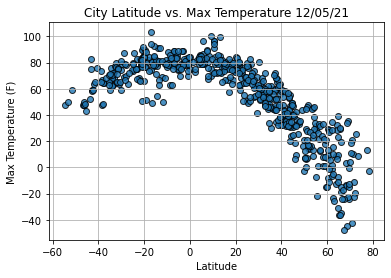

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

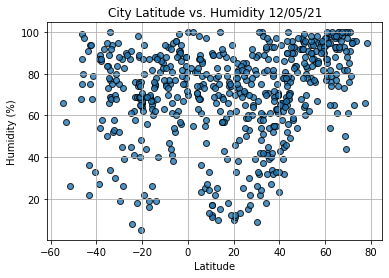

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

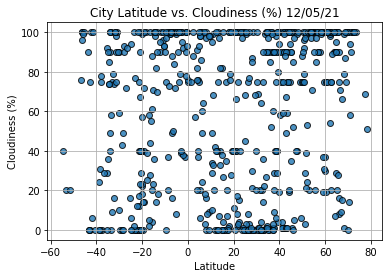

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()